In [3]:
import pandas as pd

In [4]:
def fn():
    pass

In [41]:
dag = {
    'attr-1':[fn, pd.DataFrame()],
    'bb-1':[fn, 'attr-1'],
    'overlap-1':[fn, 'bb-1'],
    'attr-2':[fn, 'overlap-1']
}

In [6]:
def get_input_to_key(dag, key):
    return dag[key][1]

In [32]:
def get_keys_with_input(dag, key, head, tail):
    q = []
    keys= []
    condition = True
    q.append(tail)
    while condition:
        cur_node = q.pop(0)
        k = get_input_to_key(dag, cur_node)
        if type(k) == type(''):
            if k == key:
                keys.append(cur_node)
            if k != head:
                q.append(k)
        if len(q) == 0:
            condition = False
    return keys
    

In [34]:
node1_input_to = get_keys_with_input(dag, 'bb-1', 'attr-1', 'attr-2')
node2_input_to = get_keys_with_input(dag, 'overlap-1', 'attr-1', 'attr-2')

In [36]:
node1_input_to, node2_input_to

(['overlap-1'], ['attr-2'])

In [43]:
d1 = dag.copy()
key1, key2 = 'bb-1', 'overlap-1'
k1 = get_input_to_key(dag, key1)
k2 = get_input_to_key(dag, key2)
if key1 == k2:
    d1[key1][1] = key2
else:
    d1[key1][1] = k2

if key2 == k1:
    d1[key2][1] = key1
else:
    d1[key2][1] = k1
    

In [57]:
help(dag.copy)

Help on built-in function copy:

copy(...)
    D.copy() -> a shallow copy of D



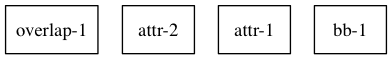

In [48]:
def list_diff(list1, list2):
    return [x for x in list1 if x not in list2]

In [49]:
list_diff(['a', 'b', 'c'], ['b'])

['a', 'c']

In [53]:
def swap_candset_candset_inputs(dag, key1, key2, head, tail):
    d1 = dag.copy()
    key1, key2 = 'bb-1', 'overlap-1'
    k1 = get_input_to_key(dag, key1)
    k2 = get_input_to_key(dag, key2)
    if key1 == k2:
        d1[key1][1] = key2
    else:
        d1[key1][1] = k2

    if key2 == k1:
        d1[key2][1] = key1
    else:
        d1[key2][1] = k1
    node1_input_to = get_keys_with_input(dag, key1, head, tail)
    node1_input_to = list_diff(node1_input_to, [key2])
    
    for key in node1_input_to:
        d1[key][1] = key2
    
    node2_input_to = get_keys_with_input(dag, key2, head, tail)
    node2_input_to = list_diff(node1_input_to, [key1])
    for key in node2_input_to:
        d1[key][1] = key2
    return d1
    



In [55]:
swap_candset_candset_inputs(dag, 'overlap-1', 'attr-2', 'attr-1', 'attr-2')

{'attr-1': [<function __main__.fn>, Empty DataFrame
  Columns: []
  Index: []],
 'attr-2': [<function __main__.fn>, 'overlap-1'],
 'bb-1': [<function __main__.fn>, 'attr-1'],
 'overlap-1': [<function __main__.fn>, 'bb-1']}